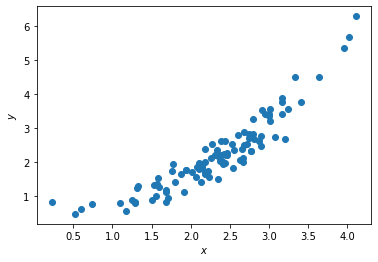

100
(100,)


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 5 17:53:07 2020
Question 1
@author: Dhirane Satvik Kona, Ramyatha Posani, Achyuth Maddala Sitaram, Mohit Bhagwat

Objective: Overfitting
"""
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from numpy.polynomial.polynomial import polyval, polyfit
# get the data
np.random.seed(22)
data = np.loadtxt('data_HW1_ex1.csv',delimiter=',')
x,y = data[:,0],data[:,1]
# plot
plt.figure(1)
plt.plot(x,y,'o')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()
print(x.shape[0])
print(y.shape)

In [2]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2,shuffle=True)

In [3]:
def regression(x,y,max_k,coeff=None):
    min_x, max_x = min(x), max(x)
    min_y, max_y = min(y), max(y)
    xrange = np.arange(min_x, max_x, .02)
    tr_loss = []
    fig = plt.figure(figsize=(8, 16))
    flag = False
    if coeff is None:
        coeff = []
        flag = True
    for k in range(max_k+1):
        if flag:
            coeff.append(polyfit(x, y, k))
            #print(coeff[0].shape)
            tr_loss.append(np.mean((y - polyval(x, coeff[k]))**2))
            ax = fig.add_subplot(int(max_k/5)+1, 5, k+1)
            ax.plot(xrange, polyval(xrange, coeff[k]), label= r'Polynomial', color='red')
        else:
            #coeff.append(polyfit(x, y, k))
            tr_loss.append(np.mean((y - polyval(x, coeff[k]))**2))
            ax = fig.add_subplot(int(max_k/5)+1, 5, k+1)
            ax.plot(xrange, polyval(xrange, coeff[k]), label= r'Polynomial', color='red')
            
        ax.scatter(x, y, s=5, label= r'data $\{x_i,y_i\}_{i=1..N}$',color='blue')
        ax.set_title('order = ' + str(k))
        ax.axis([min_x, max_x, min_y, max_y])
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        #ax.grid()
        plt.tight_layout()
    plt.show()
    return tr_loss,coeff

C:\Users\Mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


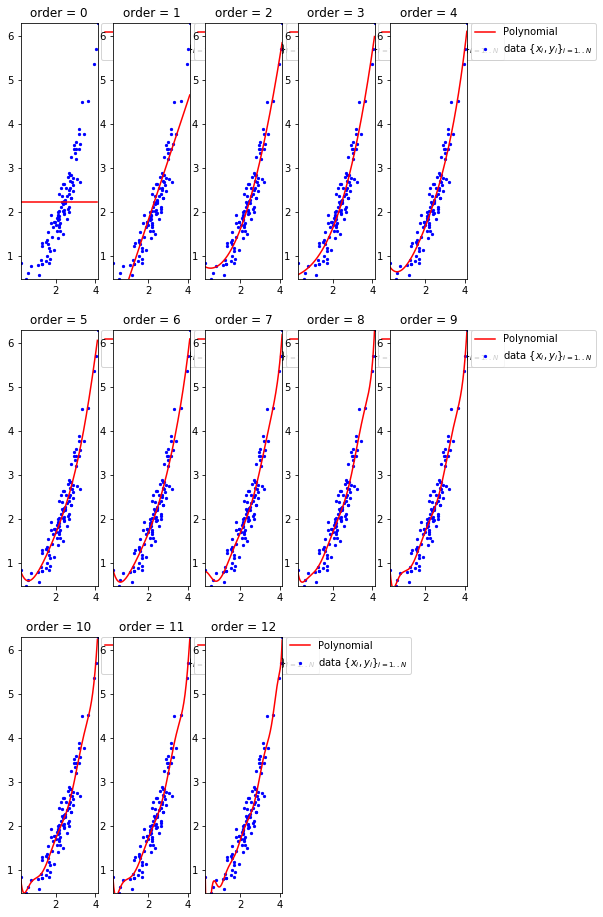

In [5]:
tr_loss,coeff = regression(x,y,12)

In [6]:
print(coeff[1].shape)

(2,)


In [7]:
print(tr_loss)

[1.1439311578943652, 0.1919503851430733, 0.09162272228230586, 0.09015301487807773, 0.08858267770107911, 0.0882941347758162, 0.08818323028792152, 0.08716472899124246, 0.08619833745892742, 0.08593490904484019, 0.0859177388081532, 0.08589460267075046, 0.08491445273277548]


========== Loss as a function of k =======


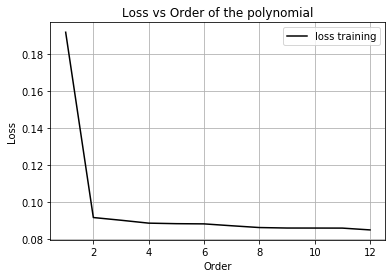

In [8]:
max_k = len(tr_loss[1:])
k = np.arange(1, max_k+1, 1)
print('========== Loss as a function of k =======')
plt.plot(k, tr_loss[1:], color='black',label='loss training')
plt.xlabel('Order')
plt.ylabel('Loss')
plt.title('Loss vs Order of the polynomial')
plt.grid()
plt.legend()
plt.show()

In [9]:
print(Xtrain.shape)

(80,)


C:\Users\Mohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


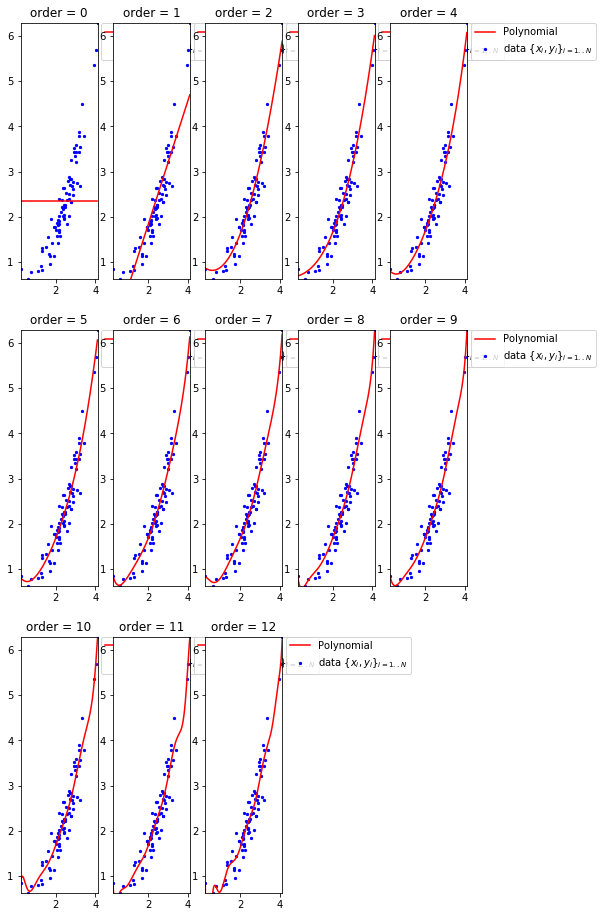

In [10]:
tr_loss,coeff = regression(Xtrain,Ytrain,12)

In [10]:
print(coeff)

[array([2.35366124]), array([-0.91853173,  1.36821007]), array([ 0.95132631, -0.47823164,  0.40919705]), array([0.66473357, 0.06759173, 0.1324947 , 0.04098953]), array([ 0.93306586, -0.80891351,  0.91210948, -0.21994604,  0.0292504 ]), array([ 0.99261655, -1.09707963,  1.30624957, -0.44425846,  0.08574061,
       -0.00519191]), array([ 1.45139178, -3.95057142,  6.65701004, -4.89742704,  1.9271214 ,
       -0.37536667,  0.02880127]), array([ 0.76174892,  1.16576847, -5.49692502,  8.47905953, -5.8549418 ,
        2.09479575, -0.37534258,  0.0266524 ]), array([ 2.56724574e+00, -1.37536570e+01,  3.60756443e+01, -4.73366565e+01,
        3.56040939e+01, -1.58664794e+01,  4.14133701e+00, -5.84052418e-01,
        3.43196112e-02]), array([ 1.64008671e+00, -5.47359298e+00,  9.89592196e+00, -5.84092175e+00,
       -2.24201586e+00,  5.24364456e+00, -3.17773467e+00,  9.54390328e-01,
       -1.45087471e-01,  8.90152158e-03]), array([-3.41612429e+00,  4.31305203e+01, -1.63056585e+02,  3.13698329e+02,

C:\Users\machy\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


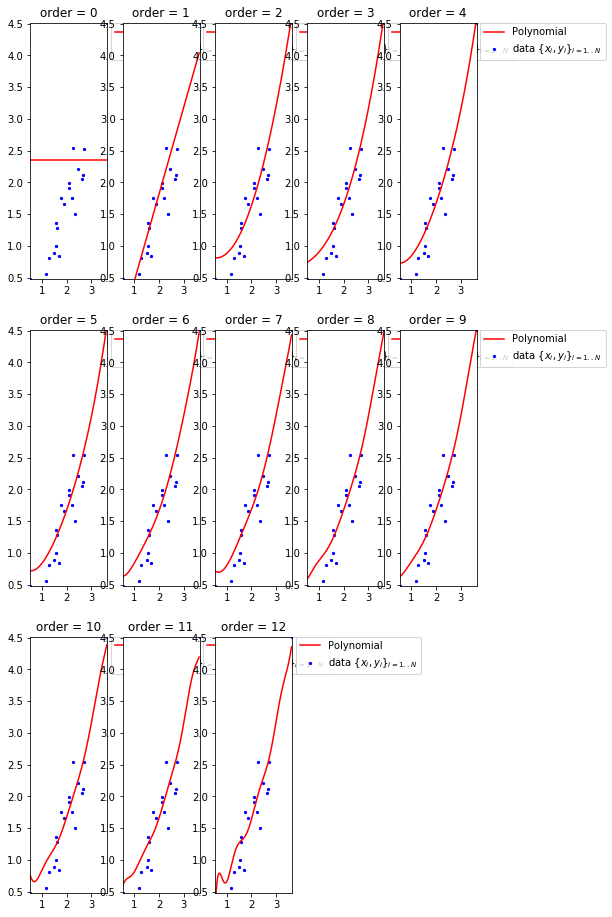

In [11]:
test_loss,coeff = regression(Xtest,Ytest,12,coeff)

In [12]:
print(coeff[0].shape)
print(coeff[1].shape)
print(coeff)

(1,)
(2,)
[array([2.35366124]), array([-0.91853173,  1.36821007]), array([ 0.95132631, -0.47823164,  0.40919705]), array([0.66473357, 0.06759173, 0.1324947 , 0.04098953]), array([ 0.93306586, -0.80891351,  0.91210948, -0.21994604,  0.0292504 ]), array([ 0.99261655, -1.09707963,  1.30624957, -0.44425846,  0.08574061,
       -0.00519191]), array([ 1.45139178, -3.95057142,  6.65701004, -4.89742704,  1.9271214 ,
       -0.37536667,  0.02880127]), array([ 0.76174892,  1.16576847, -5.49692502,  8.47905953, -5.8549418 ,
        2.09479575, -0.37534258,  0.0266524 ]), array([ 2.56724574e+00, -1.37536570e+01,  3.60756443e+01, -4.73366565e+01,
        3.56040939e+01, -1.58664794e+01,  4.14133701e+00, -5.84052418e-01,
        3.43196112e-02]), array([ 1.64008671e+00, -5.47359298e+00,  9.89592196e+00, -5.84092175e+00,
       -2.24201586e+00,  5.24364456e+00, -3.17773467e+00,  9.54390328e-01,
       -1.45087471e-01,  8.90152158e-03]), array([-3.41612429e+00,  4.31305203e+01, -1.63056585e+02,  3.136

In [13]:
def train_test_loss_comparison(tr_loss,test_loss,max_k):
    k = np.arange(1, max_k+1, 1)
    print('======= overfitting plot =========')
    plt.plot(k, tr_loss[1:], color='black', label= r'Train Loss')
    plt.plot(k, test_loss[1:], color='yellow', label= r'Test Loss')
    plt.xlabel('Order')
    plt.ylabel('Loss')
    plt.title('Loss vs Order of the polynomial')
    plt.grid()
    plt.legend()
    plt.show() 

In [14]:
print(tr_loss)
print(test_loss)

[1.1439716068430719, 0.20344367465088595, 0.08962096897346175, 0.08812133158955301, 0.0874105693487039, 0.08739423156587857, 0.08691500438529118, 0.08651636071237107, 0.08600547193606545, 0.08598596235038503, 0.08584638021556704, 0.08559355254063958, 0.08464478683195487]
[1.2325878923244322, 0.14867216234542524, 0.10343830107963621, 0.10288895316791799, 0.09814390304989495, 0.09761272123120665, 0.0998415583717669, 0.09721955914128666, 0.0942986851836359, 0.09562426358524191, 0.09833064634081276, 0.10061857421110551, 0.10158801382623368]


======= overfitting plot =========


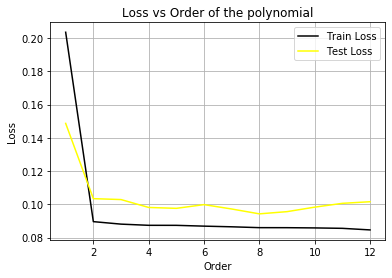

In [15]:
train_test_loss_comparison(tr_loss,test_loss,12)

In [16]:
"""" 1.c The polynomial has degree k=2 because beyond that the accuracy is not improved much """